### 作业
在提供的数据集上训练文本分类模型，对比不同模型效果

电商评论分类：好评/差评

训练集/验证集划分   

数据分析：正负样本数，文本平均长度等

实验对比3种以上模型结构的分类效果

每种模型对比模型预测速度

总结成表格输出


### Notebook 目的
观察数据，对数据进行

### 目标数据
C:\Users\Gurkha\Desktop\BaDou\Code\Course_NLP\Week7\demo\文本分类练习.csv



   label           review
0      1     很快，好吃，味道足，量大
1      1     没有送水没有送水没有送水
2      1         非常快，态度好。
3      1  方便，快捷，味道可口，快递给力
4      1     菜味道很棒！送餐很及时！


Data length before filtering: 11987


label
0    7987
1    4000
Name: count, dtype: int64
Max length: 463
Mean length: 25.048552598648534


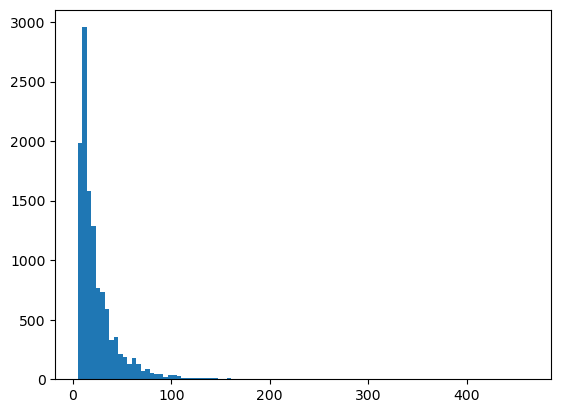

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv(r'C:\Users\Gurkha\Desktop\BaDou\Code\Course_NLP\Week7\demo\文本分类练习.csv')
print(data[0:5])

print("\n")
print(f"Data length before filtering: {len(data)}")
print("\n")

# count类别
print(data['label'].value_counts())

# review中最长文本长度
print(f'Max length: {data['review'].map(len).max()}')

# review中平均文本长度
print(f'Mean length: {data['review'].map(len).mean()}')

# review中数据分布，matplotlib绘制直方图
plt.hist(data['review'].map(len), bins=100)
plt.show()


In [2]:
# review中数据分布，每20个长度的文本数量，打印出来
review_lengths = data['review'].map(len) // 20 * 20
print(review_lengths.value_counts())



review
0      6808
20     3271
40     1027
60      474
80      171
100      98
120      51
140      31
180      17
160      16
200      11
220       3
260       3
240       2
300       2
420       1
460       1
Name: count, dtype: int64


取200为最大长度，超过200的数据舍弃

In [4]:
#取review中长度不超过120的数据，超过120的数据舍弃
data = data[data['review'].map(len) <= 120]
print(f"Data length after filtering: {len(data)}")

print("\n")

# 数据打乱
data = data.sample(frac=1).reset_index(drop=True)
print(data[0:5])

# 划分训练集和测试集
train_data = data[0: int(len(data) * 0.8)]
valid_data = data[int(len(data) * 0.8):]
print(f"Train data length:{len(train_data)}\nValidation data length:{len(valid_data)}")

# 保存训练集和测试集
train_data.to_csv(r'C:\Users\Gurkha\Desktop\BaDou\Code\Course_NLP\Week7\hw7\train.csv', index=False)
valid_data.to_csv(r'C:\Users\Gurkha\Desktop\BaDou\Code\Course_NLP\Week7\hw7\valid.csv', index=False)

Data length after filtering: 11852


   label              review
0      1      好喝！味道不错！送餐也很快！
1      0         送餐将近两个小时，太慢
2      0          面到了已经粘成一坨了
3      1  味道很不错，就是油很大，吃的有点腻！
4      1               稍微有点晚
Train data length:9481
Validation data length:2371
